# Forecasting Assignment

## 1) Dataset - Airlines+Data

In [55]:
import pandas as pd 
from numpy import sqrt
import numpy as np 
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
import itertools
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime, time

In [56]:
data = pd.read_excel('Airlines+Data.xlsx')
data[:3]

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132


In [57]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [58]:
data.shape

(96, 2)

In [59]:
# checking the null values
data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [60]:
# Checking the datatype of the attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [61]:
data['Month'] = pd.to_datetime(data['Month'],infer_datetime_format = True)
indexedDataset = data.set_index(['Month'])
data.head(3)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132


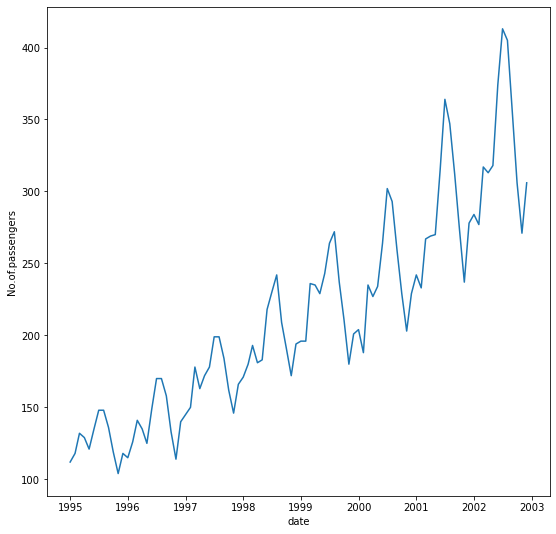

In [62]:
plt.xlabel("date")
plt.ylabel("No.of.passengers")
plt.plot(indexedDataset)

In [63]:
rolmean = indexedDataset.rolling(window=12).mean()

In [64]:
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01  316.833333
2002-09-01  320.416667
2002-10-01  323.083333
2002-11-01  325.916667
2002-12-01  328.250000

[96 rows x 1 columns]             Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01   54.530781
2002-09-01   55.586883
2002-10-01   53.899668
2002-11-01   49.692616
2002-12-01   47.861780

[96 rows x 1 columns]


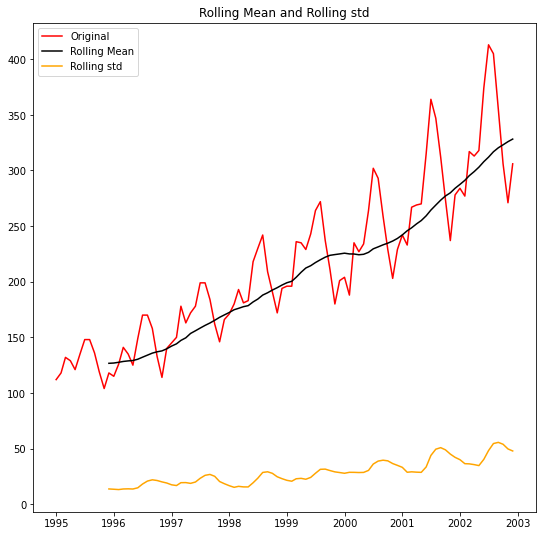

In [65]:
orig = plt.plot(indexedDataset, color='red', label = 'Original')
mean = plt.plot(rolmean, color = 'black', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'orange', label = 'Rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Rolling std')
plt.show(block=False)

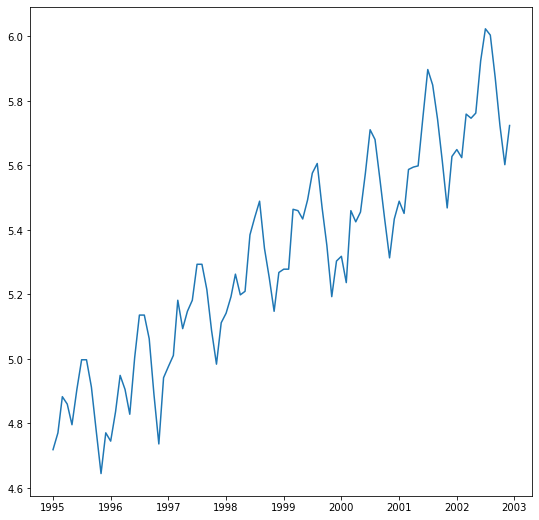

In [66]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

In [67]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()

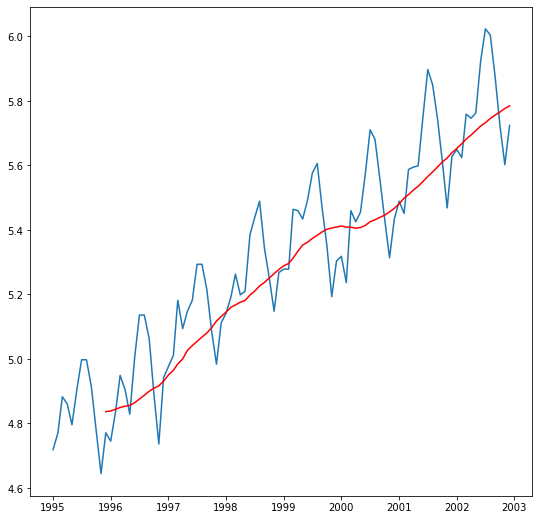

In [68]:
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')

In [69]:
df = indexedDataset_logScale - movingAverage
df.head(4)

,Passengers
Month,
1995-01-01,NaN
1995-02-01,NaN
1995-03-01,NaN
1995-04-01,NaN


In [70]:
df.dropna(inplace = True)

In [71]:
df[:3]

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566


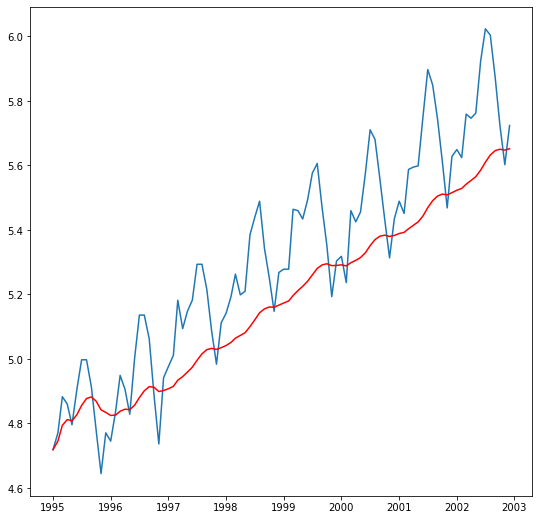

In [72]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color = 'red')

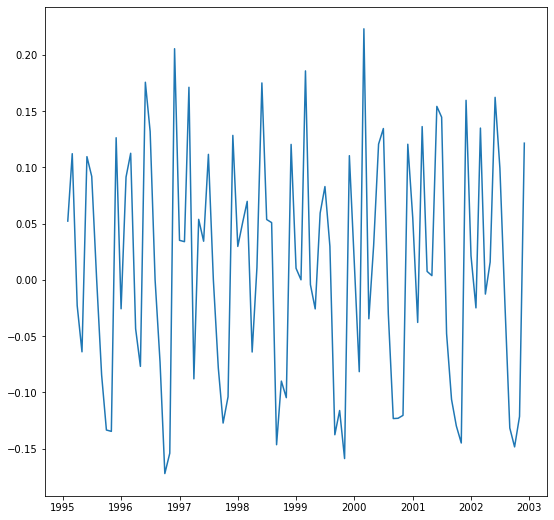

In [73]:
datasetLogScaleMinusMovingExponentDecayAverage = indexedDataset_logScale-exponentialDecayWeightedAverage
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

In [74]:
datasetLogDiffShifting[:3]

,Passengers
Month,
1995-01-01,NaN
1995-02-01,0.052186
1995-03-01,0.112117


In [75]:
datasetLogDiffShifting.dropna(inplace=True)
datasetLogDiffShifting[:3]

,Passengers
Month,
1995-02-01,0.052186
1995-03-01,0.112117
1995-04-01,-0.022990


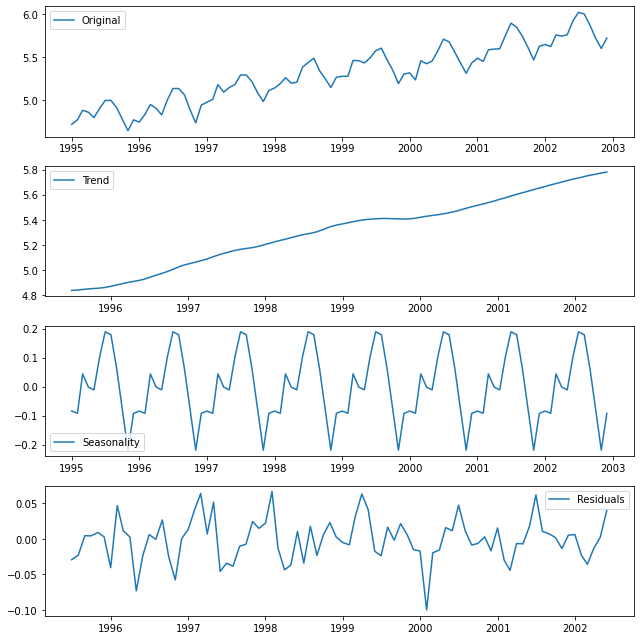

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label = "Original")
plt.legend(loc = "best")

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc = 'best')
plt.tight_layout()
decompositionLogData = residual
decompositionLogData.dropna(inplace=True)

In [77]:
from statsmodels.tsa.stattools import acf,pacf

In [78]:
acf = acf(datasetLogDiffShifting, nlags = 20)
pacf = pacf(datasetLogDiffShifting, nlags = 20, method = 'ols')

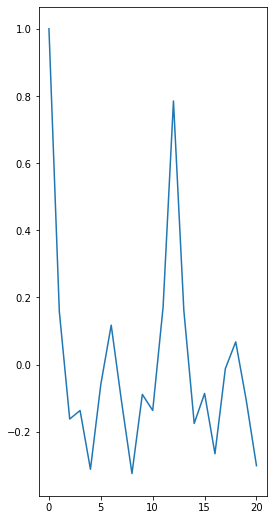

In [79]:
plt.subplot(121)
plt.plot(acf)

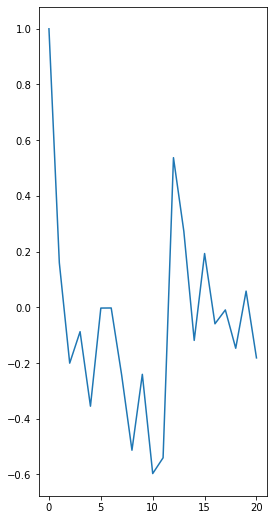

In [80]:
plt.subplot(122)
plt.plot(pacf)

C:\Users\rakes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\rakes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


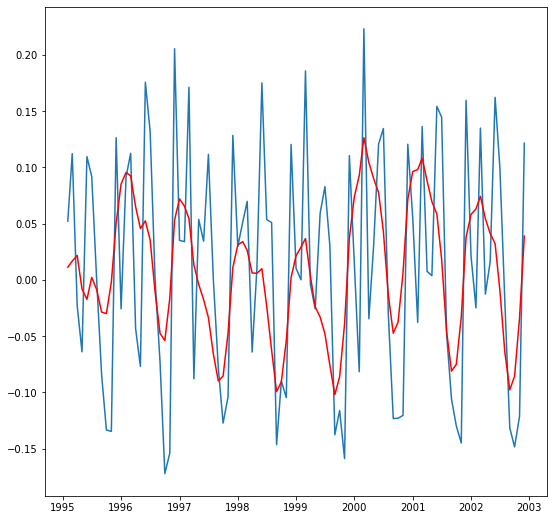

In [81]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(indexedDataset_logScale, order= (2,1,2))
results_AR = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color = 'red')

In [82]:
predictions_ARIMA_diff = pd.Series(results_AR. fittedvalues,copy = True)

In [83]:
predictions_ARIMA_diff

Month
1995-02-01    0.011261
1995-03-01    0.016603
1995-04-01    0.021664
1995-05-01   -0.008096
1995-06-01   -0.017396
                ...   
2002-08-01   -0.064372
2002-09-01   -0.097868
2002-10-01   -0.085681
2002-11-01   -0.033962
2002-12-01    0.038855
Length: 95, dtype: float64

In [84]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum

Month
1995-02-01    0.011261
1995-03-01    0.027864
1995-04-01    0.049527
1995-05-01    0.041431
1995-06-01    0.024035
                ...   
2002-08-01    0.954067
2002-09-01    0.856199
2002-10-01    0.770518
2002-11-01    0.736556
2002-12-01    0.775411
Length: 95, dtype: float64

In [85]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Passengers'].iloc[0], index = indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

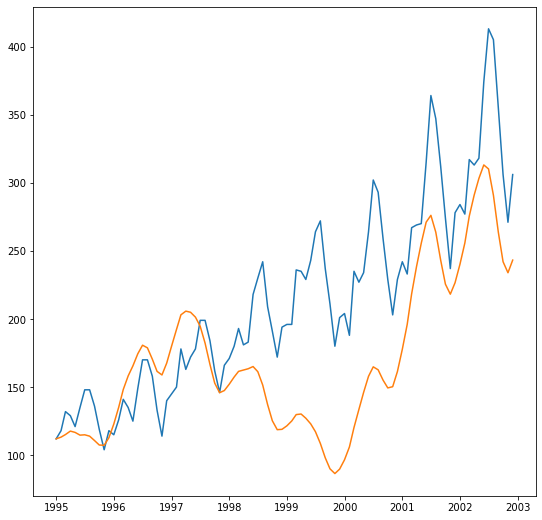

In [86]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

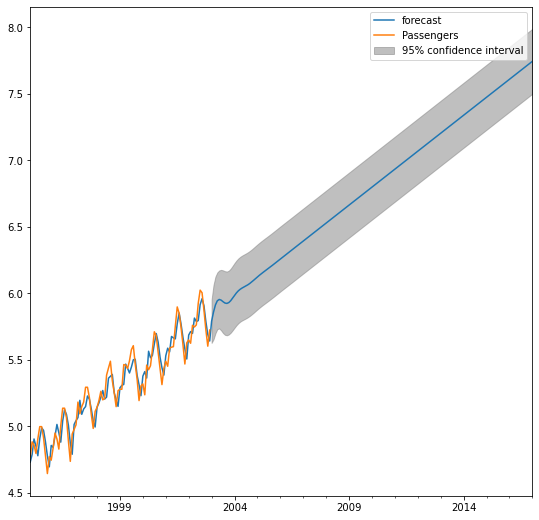

In [87]:
results_AR.plot_predict(1,264)
results = results_AR.forecast(steps = 100)

In [89]:
results[1]

array([0.08321398, 0.10429885, 0.10874384, 0.10874769, 0.11126071,
       0.11613368, 0.12022657, 0.12202956, 0.12227498, 0.12233694,
       0.12284912, 0.1235748 , 0.12408371, 0.12425729, 0.124265  ,
       0.12429511, 0.12439354, 0.12450089, 0.1245618 , 0.1245762 ,
       0.12457622, 0.12458495, 0.12460224, 0.12461726, 0.12462401,
       0.12462493, 0.12462516, 0.12462711, 0.12462987, 0.1246318 ,
       0.12463245, 0.12463247, 0.1246326 , 0.12463299, 0.12463341,
       0.12463365, 0.12463371, 0.12463371, 0.12463374, 0.1246338 ,
       0.12463386, 0.12463388, 0.12463388, 0.12463388, 0.12463389,
       0.1246339 , 0.12463391, 0.12463392, 0.12463392, 0.12463392,
       0.12463392, 0.12463392, 0.12463392, 0.12463392, 0.12463392,
       0.12463392, 0.12463392, 0.12463392, 0.12463392, 0.12463392,
       0.12463392, 0.12463392, 0.12463392, 0.12463392, 0.12463392,
       0.12463392, 0.12463392, 0.12463392, 0.12463392, 0.12463392,
       0.12463392, 0.12463392, 0.12463392, 0.12463392, 0.12463

In [90]:
len(results[1])

100

##  2) Dataset - Cocacola Sales

### Objective:- 
###             We want predict cocacola sales

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import warnings
warnings.filterwarnings("ignore")
import statsmodels.formula.api as smf

In [93]:
data = pd.read_excel('Cocacola_Sales_Rawdata.xlsx')

In [94]:
data[:3]

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993


In [95]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [96]:
data.shape

(42, 2)

In [97]:
# checking the null value
data.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [98]:
# Cheking the datatype of the attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


### Reading the dataset again for visualization

In [100]:
data_vis = pd.read_excel('CocaCola_Sales_Rawdata.xlsx',header=0, index_col=0, parse_dates=None,squeeze=True)

In [101]:
data_vis.head()

Quarter
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Quarter'>

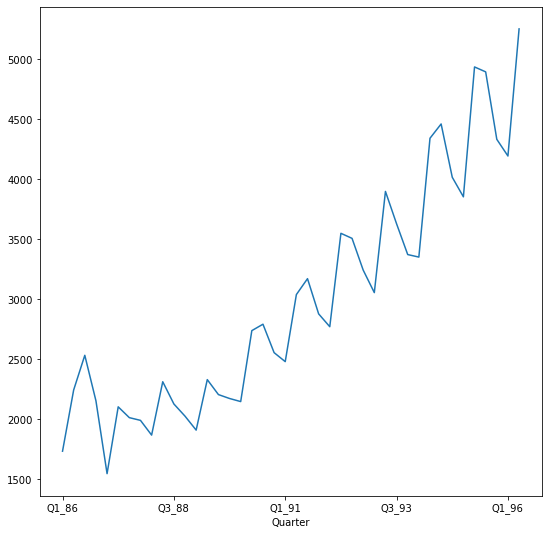

In [102]:
data_vis.plot()

(array([ 4., 10.,  5.,  4.,  6.,  3.,  3.,  4.,  0.,  3.]),
 array([1547.81899643, 1918.33709679, 2288.85519714, 2659.3732975 ,
        3029.89139786, 3400.40949821, 3770.92759857, 4141.44569893,
        4511.96379929, 4882.48189964, 5253.        ]),
 <BarContainer object of 10 artists>)

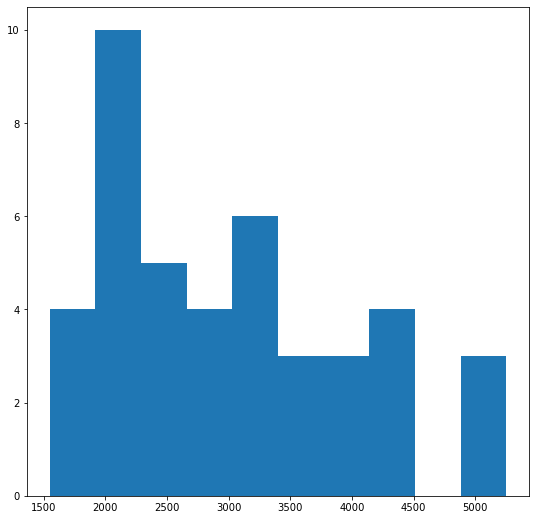

In [103]:
plt.hist(data_vis)

<AxesSubplot:ylabel='Density'>

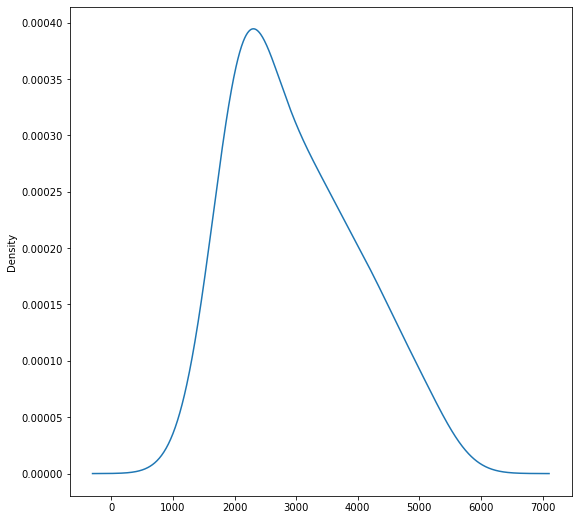

In [104]:
data_vis.plot(kind='kde')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

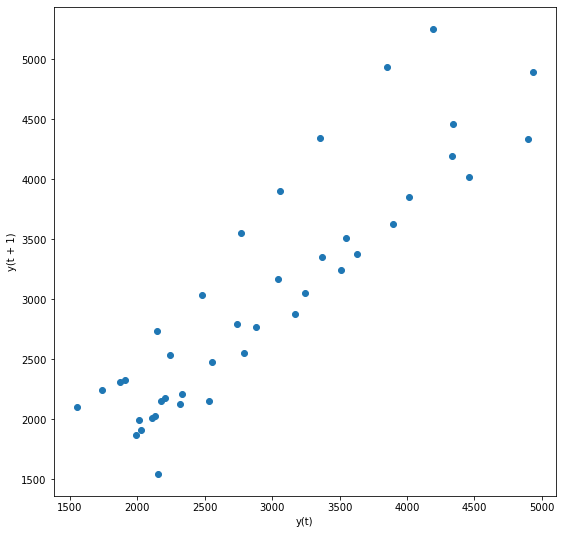

In [105]:
lag_plot(data_vis)

### Model building

In [106]:
data['Quarters'] = 0
data['Year'] = 0
for i in range(42):
    p = data["Quarter"][i]
    data['Quarters'][i]=p[0:2]
    data['Year'][i]= p[3:5]
data.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [107]:
quater_dumies = pd.DataFrame(pd.get_dummies(data.Quarters))
quater_dumies.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [108]:
data = pd.concat([data,quater_dumies],axis=1)
data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [109]:
data['t']=range(1,43)
data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5


In [110]:
data['t_squared'] = data.t*data.t
data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25


In [111]:
data['log_Sales'] = np.log(data.Sales)
data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


<AxesSubplot:xlabel='Quarters', ylabel='Year'>

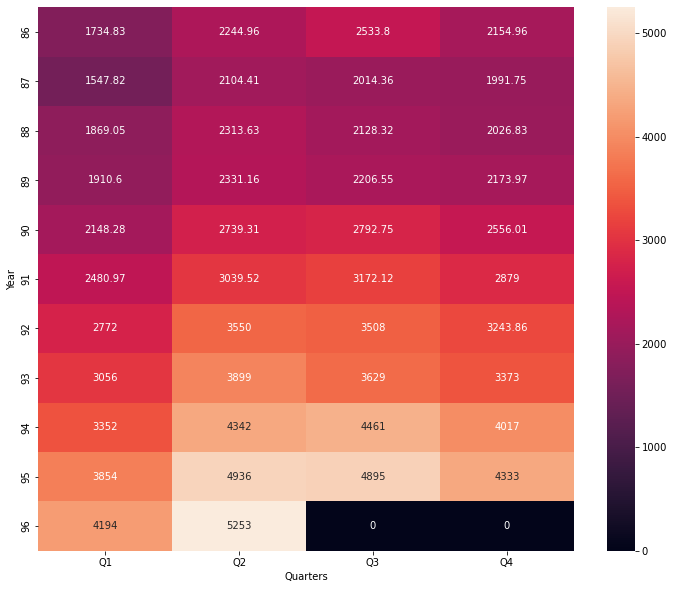

In [112]:
plt.figure(figsize=(12,10))
plot_month_y = pd.pivot_table(data = data, values="Sales", index = "Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(plot_month_y, annot=True, fmt = "g")

<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

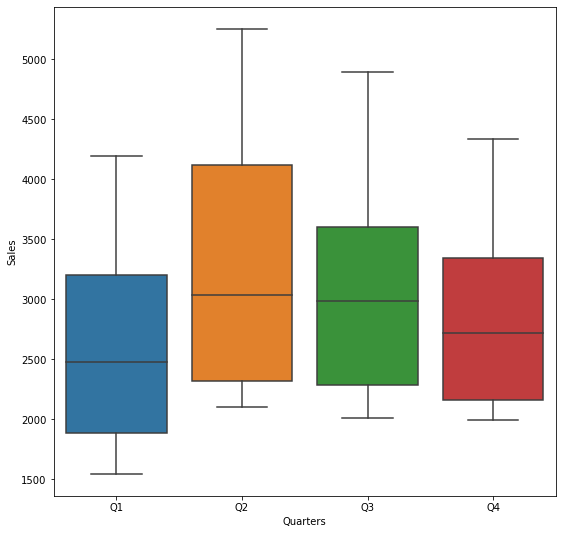

In [113]:
sns.boxplot(x='Quarters',y='Sales',data=data)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

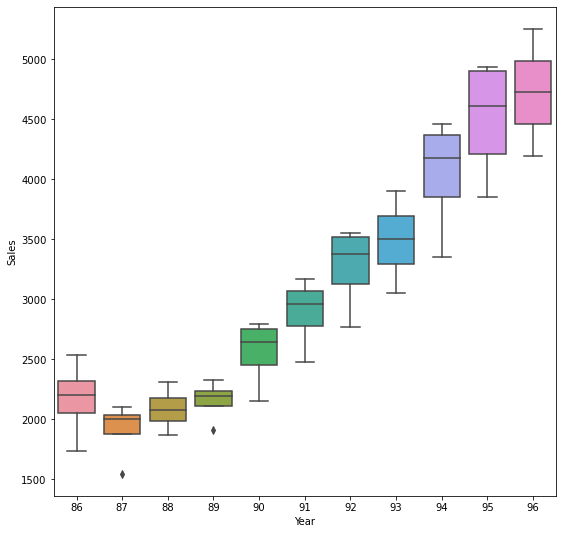

In [114]:
sns.boxplot(x="Year",y='Sales',data = data)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

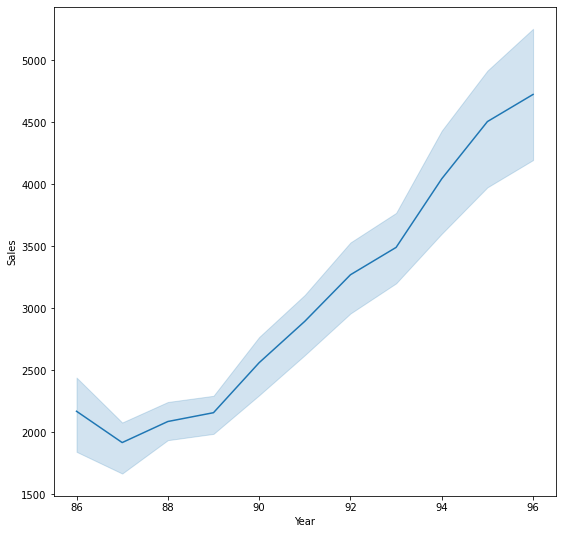

In [115]:
sns.lineplot(x='Year',y='Sales',data=data)

In [116]:
train = data.head(35)
test = data.tail(7)

### Developing the linear model

In [117]:
linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
pred_linear

35    3840.422277
36    3904.126945
37    3967.831612
38    4031.536280
39    4095.240948
40    4158.945616
41    4222.650284
dtype: float64

In [118]:
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

636.5072930351146

### Developing the model of exponential

In [119]:
exp_model = smf.ols('log_Sales~t',data=train).fit()
pred_exp = pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
pred_exp

35    8.280213
36    8.303351
37    8.326489
38    8.349626
39    8.372764
40    8.395901
41    8.419039
dtype: float64

In [120]:
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

493.348648484222

### Developing the model of quadratic

In [123]:
quad_model = smf.ols("Sales~t+t_squared",data=train).fit()
pred_quad = pd.Series(quad_model.predict(test[["t","t_squared"]]))
pred_quad

35    4337.773235
36    4484.369729
37    4635.446862
38    4791.004635
39    4951.043047
40    5115.562098
41    5284.561789
dtype: float64

In [124]:
rmse_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quad))**2))
rmse_quad

511.81173194173283

### Developing the model of Additive seasonality

In [125]:
add_sea_model = smf.ols('Sales~Q1+Q2+Q3+Q4',data = train).fit()
pred_add_sea = pd.Series(add_sea_model.predict(test[['Q1','Q2','Q3','Q4']]))
pred_add_sea

35    2549.922247
36    2319.061332
37    2951.555664
38    2938.434220
39    2549.922247
40    2319.061332
41    2951.555664
dtype: float64

In [126]:
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1861.870416425175

### Developing the model of Additive seasonality quadratic

In [127]:
add_sea_Quad_model = smf.ols('Sales ~ t+t_squared+Q1+Q2+Q3+Q4',data = train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad_model.predict(test[['t','t_squared','Q1','Q2','Q3','Q4']]))
pred_add_sea_quad

35    4197.333511
36    4120.453583
37    4840.142044
38    4914.214728
39    4795.942579
40    4736.501477
41    5473.628762
dtype: float64

In [128]:
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

309.4641395163693

### Developing the model of multiplicative seasonality

In [129]:
mul_sea_model = smf.ols('log_Sales ~ Q1+Q2+Q3+Q4',data = train).fit()
pred_mult_sea = pd.Series(mul_sea_model.predict(test))
pred_mult_sea

35    7.823789
36    7.716661
37    7.958124
38    7.951932
39    7.823789
40    7.716661
41    7.958124
dtype: float64

In [130]:
rmse_mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_sea

1938.9332351966193

### Developing the model of Multiplicative Additive Seasonality

In [131]:
mul_add_sea = smf.ols('log_Sales ~ t+Q1+Q2+Q3+Q4',data = train).fit()
pred_mult_add_sea = pd.Series(mul_add_sea.predict(test))
pred_mult_add_sea

35    8.231646
36    8.169836
37    8.411299
38    8.405107
39    8.322281
40    8.260471
41    8.501934
dtype: float64

In [132]:
rmse_mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mult_add_sea)))**2))
rmse_mult_add_sea

339.1874666994836

### Comparing the above results

In [134]:
data1 = {"MODEL":pd.Series(['rmse_linear','rmse_Exp','rmse_Quad','rmse_add_sea','rmse_add_sea_quad','rmse_Mult_sea','rmse_Mult_add_sea']),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea])}
table_rmse = pd.DataFrame(data1)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,309.464140
6,rmse_Mult_add_sea,339.187467
1,rmse_Exp,493.348648
2,rmse_Quad,511.811732
0,rmse_linear,636.507293
3,rmse_add_sea,1861.870416
5,rmse_Mult_sea,1938.933235


### Developing the model of the additive seasonality quadratic gives the best result